<a href="https://colab.research.google.com/github/newguy7/DataScienceProjects/blob/main/Weather_Condition_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('weather_data_2024.csv')

In [ ]:
# Check dataset shape and information
print("Dataset Shape:")
print(df.shape)
print("\nDataset Information:")
print(df.info())

Dataset Shape:
(40, 5)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               40 non-null     object 
 1   Temperature        38 non-null     float64
 2   Precipitation      40 non-null     float64
 3   Wind Speed         40 non-null     float64
 4   Weather Condition  40 non-null     object 
dtypes: float64(3), object(2)
memory usage: 1.7+ KB
None


In [ ]:
# Check for missing values
missing_values = df.isna().values.any()
print(f"Missing values in the dataset?: {missing_values}")

Missing values in the dataset?: True


In [ ]:
# Clean the dataset by dropping rows with missing values
clean_df = df.dropna()
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 0 to 39
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               38 non-null     object 
 1   Temperature        38 non-null     float64
 2   Precipitation      38 non-null     float64
 3   Wind Speed         38 non-null     float64
 4   Weather Condition  38 non-null     object 
dtypes: float64(3), object(2)
memory usage: 1.8+ KB


In [ ]:
# Convert Date column to datetime
clean_df['Date'] = pd.to_datetime(clean_df.Date)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 0 to 39
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               38 non-null     datetime64[ns]
 1   Temperature        38 non-null     float64       
 2   Precipitation      38 non-null     float64       
 3   Wind Speed         38 non-null     float64       
 4   Weather Condition  38 non-null     object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 1.8+ KB


<ipython-input-92-259a03b6db64>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Date'] = pd.to_datetime(clean_df.Date)


In [ ]:
# Calculate the month for each date
if 'Month' not in clean_df.columns:
    clean_df['Month'] = clean_df['Date'].dt.to_period('M').astype(str)
clean_df

<ipython-input-93-886ee4e41cd5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Month'] = clean_df['Date'].dt.to_period('M').astype(str)


,Date,Temperature,Precipitation,Wind Speed,Weather Condition,Month
0,2024-01-01,5.2,0.0,3.4,Sunny,2024-01
1,2024-01-02,4.8,0.0,2.8,Cloudy,2024-01
2,2024-01-03,6.5,0.2,4.1,Rainy,2024-01
3,2024-01-04,3.9,0.0,3.0,Sunny,2024-01
5,2024-01-06,2.3,0.0,3.2,Sunny,2024-01
6,2024-01-07,1.8,0.1,2.5,Rainy,2024-01
7,2024-01-08,4.0,0.0,3.8,Sunny,2024-01
8,2024-01-09,5.6,0.0,3.7,Cloudy,2024-01
9,2024-01-10,6.8,0.3,4.5,Rainy,2024-01
10,2024-02-01,3.7,0.0,3.2,Cloudy,2024-02


In [ ]:
# Calculate the mean temperature for each month
monthly_mean_temp = clean_df.groupby('Month').agg({'Temperature':'mean'}).reset_index()
monthly_mean_temp = round(monthly_mean_temp,2)
monthly_mean_temp

,Month,Temperature
0,2024-01,4.54
1,2024-02,4.06
2,2024-03,6.79
3,2024-04,9.77


In [ ]:
# Calculate the total precipitation for each month
monthly_precipitation = clean_df.groupby('Month').agg({'Precipitation':'sum'}).reset_index()
monthly_precipitation = round(monthly_precipitation,2)
monthly_precipitation

,Month,Precipitation
0,2024-01,0.6
1,2024-02,0.2
2,2024-03,0.4
3,2024-04,0.4


In [ ]:
# Calculate average wind speed for each month
monthly_avg_windspeed = clean_df.groupby('Month').agg({'Wind Speed':'mean'}).reset_index()
monthly_avg_windspeed = round(monthly_avg_windspeed,2)
monthly_avg_windspeed

,Month,Wind Speed
0,2024-01,3.44
1,2024-02,3.19
2,2024-03,3.42
3,2024-04,3.76


In [ ]:
# Data Visualization

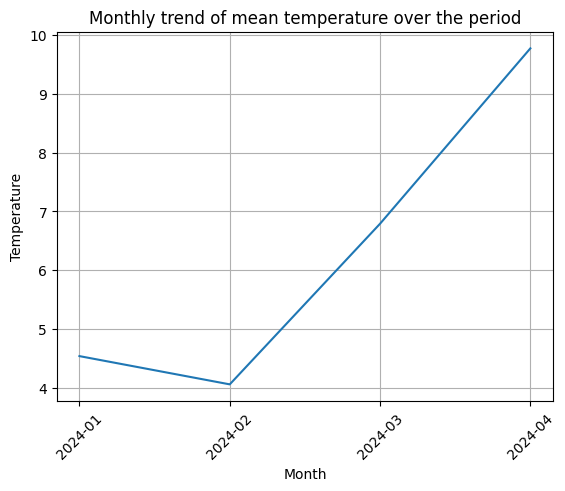

In [ ]:
# Monthly trend of mean temperature over the period
y = monthly_mean_temp.Temperature
x = monthly_mean_temp['Month']

plt.plot(x,y)

plt.xlabel("Month")
plt.ylabel("Temperature")
plt.title("Monthly trend of mean temperature over the period")
plt.grid()
plt.xticks(rotation=45)
plt.show()

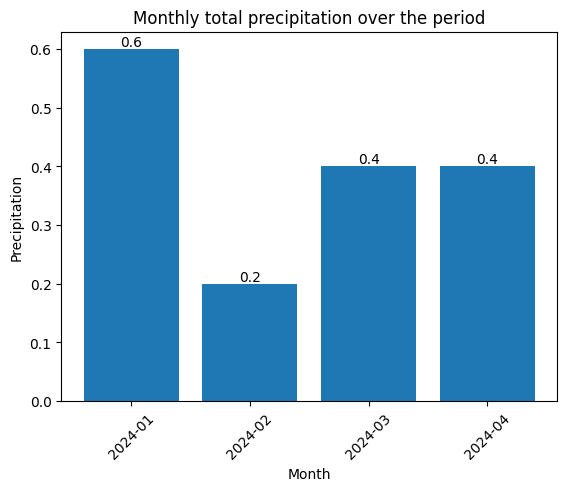

In [ ]:
# Monthly total precipitation over the period
x_labels_list = monthly_precipitation.Month
y_values_list = monthly_precipitation.Precipitation

plt.bar(x_labels_list,y_values_list)
# show value on top of each bar
for index, value in enumerate(y_values_list):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xlabel("Month")
plt.ylabel("Precipitation")
plt.title("Monthly total precipitation over the period")
plt.xticks(rotation=45)
plt.show()


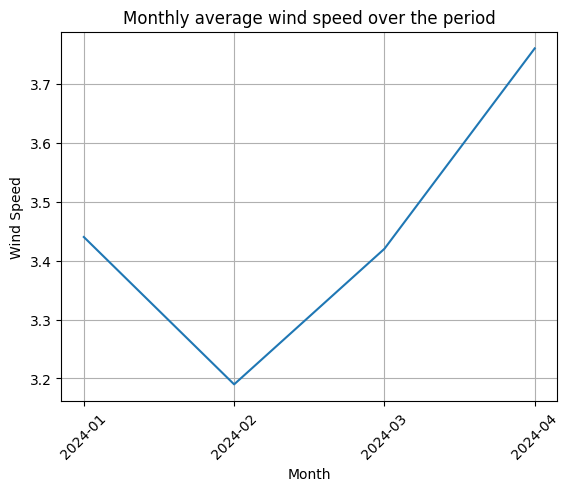

In [ ]:
# Monthly average wind speed over the period
y = monthly_avg_windspeed['Wind Speed']
x = monthly_avg_windspeed['Month']
plt.plot(x,y)

plt.xlabel("Month")
plt.ylabel("Wind Speed")
plt.title("Monthly average wind speed over the period")
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [ ]:
# Data Preprocessing (Scaling)

# Label Data
Y = clean_df['Weather Condition']

# Features Data
X = clean_df.drop(['Date','Weather Condition','Month'],axis=1)

In [ ]:
clean_df['Weather Condition'].unique()


array(['Sunny', 'Cloudy', 'Rainy'], dtype=object)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# One hot encoding for Label
label_encoded = []
for k in Y:
  if k=='Sunny':
    label_encoded.append(0)
  elif k == 'Cloudy':
    label_encoded.append(1)
  elif k == 'Rainy':
    label_encoded.append(2)

print(label_encoded)

#reshape(#rows,#columns)
# -1 allows NumPy to figure out how many rows are needed to fit all the elements into a single column
label_array = np.array(label_encoded).reshape(-1,1)

# Create instance of OneHotEncoder
ENCODER = OneHotEncoder()
ENCODER.fit(label_array)
print(ENCODER.categories_)
encoded_Y = ENCODER.transform(label_array).toarray()


[0, 1, 2, 0, 0, 2, 0, 1, 2, 1, 0, 1, 0, 0, 1, 0, 2, 0, 0, 1, 2, 0, 0, 2, 1, 0, 1, 0, 0, 1, 2, 0, 0, 2, 1, 0, 1, 0]
[array([0, 1, 2])]


In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,encoded_Y,test_size=.2)

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# Model TRAINING; pass features and labels
knn.fit(X_train,y_train)

# Model PREDICTION. Pass Testing features only.
pred_labels_knn = knn.predict(X_test)

print(pred_labels_knn[1])
print(y_test[1])

# Convert arrays to lists for comparison
y_pred_list = pred_labels_knn.tolist()
y_test_list = y_test.tolist()

# Accuracy of the model
accuracy_knn = 0
for x in range(len(pred_labels_knn)):
  if y_pred_list[x] == y_test_list[x]:
    accuracy_knn += 1
accuracy_knn = round(accuracy_knn/len(pred_labels_knn)*100,2)
print(f"The accuracy of the KNN Model is {accuracy_knn}%")

[0. 1. 0.]
[1. 0. 0.]
The accuracy of the KNN Model is 25.0%


In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train,y_train)

pred_labels_dec_tree = dec_tree.predict(X_test)

# Convert arrays to lists for comparison
y_pred_list = pred_labels_dec_tree.tolist()
y_test_list = y_test.tolist()

# Accuracy of the model
accuracy_decision_tree = 0
for x in range(len(pred_labels_dec_tree)):
  if y_pred_list[x] == y_test_list[x]:
    accuracy_decision_tree += 1
accuracy_decision_tree = round(accuracy_decision_tree/len(pred_labels_dec_tree)*100,2)
print(f"The accuracy of the Decision Tree Model is {accuracy_decision_tree}%")

The accuracy of the Decision Tree Model is 50.0%


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

random = RandomForestClassifier()
random.fit(X_train,y_train)

pred_lbls_rf = random.predict(X_test)
pred_lbls_rf.shape

# Convert arrays to lists for comparison
y_pred_list = pred_lbls_rf.tolist()
y_test_list = y_test.tolist()

# Accuracy of the model
accuracy_random_forest = 0
for x in range(len(y_pred_list)):
  if y_pred_list[x] == y_test_list[x]:
    accuracy_random_forest += 1
accuracy_random_forest = round(accuracy_random_forest/len(y_pred_list)*100,2)
print(f"The accuracy of the Random Forest Model is {accuracy_random_forest}%")

The accuracy of the Random Forest Model is 37.5%


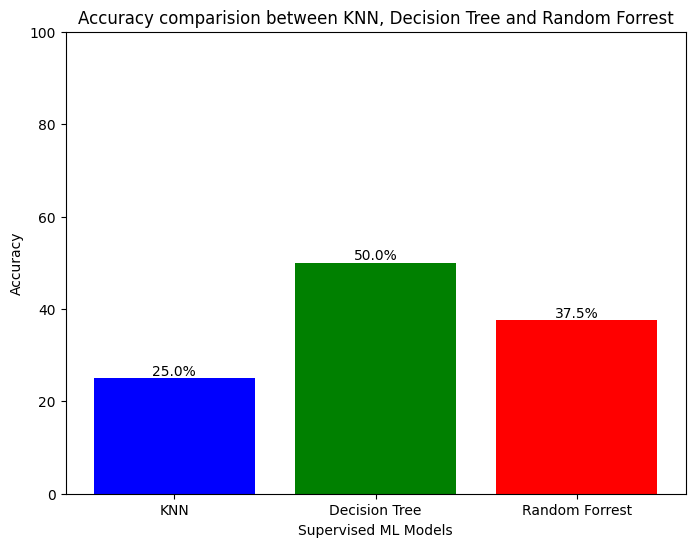

In [ ]:
# Comparision of all accuracies with a bar chart
x_labels = ['KNN', 'Decision Tree','Random Forrest']
y_values = [accuracy_knn, accuracy_decision_tree,accuracy_random_forest]

plt.figure(figsize=(8, 6))
plt.bar(x_labels,y_values,color=['blue','green','red'])
# show value on top of each bar
for index, value in enumerate(y_values):
    plt.text(index, value, str(value)+'%', ha='center', va='bottom')

plt.ylim(0,100)
plt.xlabel('Supervised ML Models')
plt.ylabel('Accuracy')
plt.title('Accuracy comparision between KNN, Decision Tree and Random Forrest')

plt.show()